# Overcoming a Theoretical Limitation of Self-Attention 

In [1]:
import sys 
sys.path.append('../')
from src.transformer import StandardTransformer
import torch

## Learning One

Define training parameters..

In [2]:
vocab = ["0", "1", "$"]

epochs = 50
layers = 2
heads = 1 
d_model = 16
d_ffnn = 64  
eps = 1e-5 # value added to denominator in layer normalization
scaled = False

### Generalization experiment

Initialize the Transformer.

In [3]:
transformer = StandardTransformer(len(vocab), layers, heads, d_model, d_ffnn, scaled, eps, positional="first")
optim = torch.optim.Adam(transformer.parameters(), lr=0.0003)

Define model trainer and train the transformer.

In [4]:
from src.trainer import Trainer
from src.dataset import Dataset

trainset = Dataset(0, 100, 100, random_seed=42, train=True, data_type='one', variable_lenght=True)
testset = Dataset(0, 100, 500,  random_seed=42,  train=False, data_type='one', variable_lenght=False)

trainer = Trainer(0, transformer, optim, vocab, epochs, trainset, testset, verbose=0)
train_l, val_l, train_acc, val_acc = trainer.train()

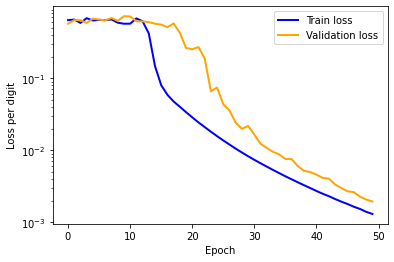

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(epochs), train_l, color='blue', lw=2, label="Train loss")
plt.plot(range(epochs), val_l, color='orange', lw=2, label="Validation loss")
plt.yscale('log')
plt.ylabel("Loss per digit")
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()

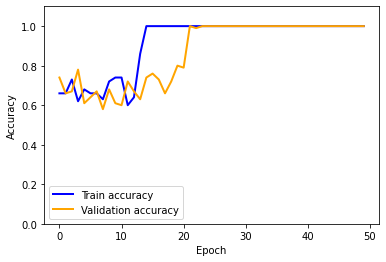

In [6]:
fig = plt.figure()
plt.plot(range(epochs), train_acc, color='blue', lw=2, label="Train accuracy")
plt.plot(range(epochs), val_acc, color='orange', lw=2, label="Validation accuracy")
plt.ylim([0, 1.1])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="best")
plt.show()